In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/train.csv')
print("The data is read.")

The data is read.


In [3]:
df.shape

(1460, 81)

## Outlier Handling

<AxesSubplot:xlabel='SalePrice'>

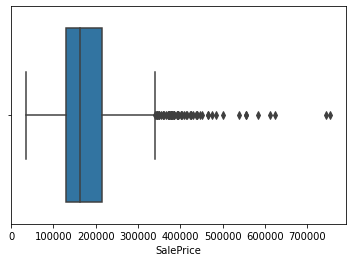

In [4]:
sns.boxplot(x = df['SalePrice'])

In [5]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
IQR = q3 - q1

In [6]:
new_bound = q3 + 3*IQR

In [9]:
df.drop(df[df.SalePrice > new_bound].index, axis = 0, inplace = True)

In [10]:
df.shape

(1448, 81)

<AxesSubplot:xlabel='SalePrice'>

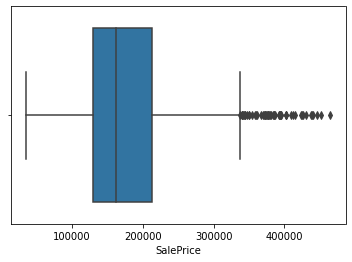

In [11]:
sns.boxplot(x = df['SalePrice'])

## Removing Multicolinearity

In [12]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
multi_col = numeric_features.corr().drop('SalePrice',axis =1)
multi_col = multi_col.drop('SalePrice',axis =0)

In [14]:
null_val = df.isnull().sum()
null_val = null_val[null_val > 0.2*1148]
null_val.sort_values(inplace = True)

In [37]:
df.shape[0]

1448

In [15]:
null_val

LotFrontage     258
FireplaceQu     690
Fence          1169
Alley          1357
MiscFeature    1394
PoolQC         1442
dtype: int64

In [24]:
numeric_features.corr().SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.800000
GrLivArea        0.679068
GarageCars       0.653663
GarageArea       0.632507
TotalBsmtSF      0.594397
1stFlrSF         0.584448
YearBuilt        0.556740
FullBath         0.552082
YearRemodAdd     0.534765
GarageYrBlt      0.508040
TotRmsAbvGrd     0.502738
Fireplaces       0.461581
MasVnrArea       0.433622
BsmtFinSF1       0.364725
LotFrontage      0.336667
WoodDeckSF       0.334476
OpenPorchSF      0.325409
2ndFlrSF         0.287455
HalfBath         0.278858
LotArea          0.252031
BsmtFullBath     0.242846
BsmtUnfSF        0.211252
BedroomAbvGr     0.164610
ScreenPorch      0.081308
MoSold           0.079185
3SsnPorch        0.055720
PoolArea         0.033403
BsmtFinSF2      -0.011770
MiscVal         -0.019849
BsmtHalfBath    -0.031552
YrSold          -0.034292
Id              -0.034666
LowQualFinSF    -0.060257
OverallCond     -0.079676
MSSubClass      -0.086540
EnclosedPorch   -0.128520
KitchenAbvGr    -0.143610
Name: SalePr

In [33]:
type(poor_cor.values)

numpy.ndarray

In [50]:
arr = []

In [53]:
corr_m = numeric_features.corr()
corr_m = corr_m['SalePrice'].sort_values(ascending = False)
poor_cor = corr_m[(corr_m.values < 0.35) & (corr_m.values > -0.03)]
arr = np.append(arr, poor_cor.index.to_list())

In [18]:
null_val.index.to_list()

['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']

In [61]:
to_remove = ['GarageCars','1stFlrSF','GrLivArea','FullBath','LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2',
       'MiscVal', 'BsmtHalfBath', 'YrSold', 'Id', 'LowQualFinSF',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr','LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']

In [62]:
df.drop(to_remove,axis = 1,inplace = True)

In [63]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000


## Categorical features encoding

In [71]:
cat_col = df.select_dtypes(include = ['object']).columns.to_list()

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
for i in cat_col:
    en = LabelEncoder()
    df[i] = en.fit_transform(df[i])

In [84]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,1,2003.0,1,548,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,1,1976.0,1,460,4,4,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,1,2001.0,1,608,4,4,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,5,1998.0,2,642,4,4,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,1,2000.0,1,836,4,4,2,8,4,250000


In [91]:
missing = df.isnull().sum().sort_values(ascending = False)
print(missing[missing > 0])

Series([], dtype: int64)


In [90]:
df.dropna(inplace = True)

In [57]:
numeric_col = df.select_dtypes(include = [np.number]).columns.to_list()
num_col_x = numeric_col[:-1]
num_col_y = numeric_col[-1]

In [59]:
print(num_col_x)
print(num_col_y)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
SalePrice


In [60]:
print(numeric_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
